In [ ]:
# Session 41 PROJECT-7 CAPESTONE PROJECT by Sreedhara Jagatagar Sreedhara

# High Level Machine Learning Classification Project Life Cycle

- <a href='#1'>1. Domain Introduction </a>
- <a href='#2'>2. Problem statement </a>
- <a href='#3'>3. Data Source </a>
- <a href='#4'>4. Data Description </a>
- <a href='#5'>5. Identify the target variable</a>
- <a href='#6'>6. Read the data </a>
- <a href='#7'>7. Inspect the data </a> 
     - <a href='#7.1'> Check few samples</a>
     - <a href='#7.1'> Check the data types</a>
     - <a href='#7.1'> Check the initial summary</a>
- <a href='#7'>8. Data Manipulation  </a>   
     - <a href='#8.1'> Check for missing values</a>
     - <a href='#8.2'> Column string fomatting </a>
     - <a href='#8.3'> Data fomatting </a>
     - <a href='#8.4'> Imputation </a>
- <a href='#9'>9. Exploratory Data Analysis</a>
    - <a href='#9.1'> univariate analysis </a>
    - <a href='#9.2'> class ditribution in data</a>
    - <a href='#9.3'> Varibles distribution according to class</a>
    - <a href='#9.4'> Bucketing </a>
    - <a href='#9.5'> Correlation Matrix</a>
    - <a href='#9.6'> feature elimination / addition / transformation </a>
- <a href='#10'>10. Data preprocessing</a>
    - <a href='#10.1'> Encoding categorical variable </a>
    - <a href='#10.2'> Normalizing features </a>
    - <a href='#10.3'> spliting train/val/test data </a>
    - <a href='#'> feature compression </a>
- <a href='#11'>11. Model Building</a>
    - <a href='#11.1'> Baseline Model</a>
    - <a href='#11.2'> Model Selection </a>
    - <a href='#11.3'> Hyper parameter Selection </a>
- <a href='#12'>12. Model Performances</a>
    - <a href='#12.1'> model performance metrics</a>
    - <a href='#12.2'> Compare model metrics</a>
    - <a href='#12.3'> Confusion matrices for models</a>
    - <a href='#12.4'> ROC - Curves  for models</a>
    - <a href='#12.5'> Precision recall curves</a>
- <a href='#13'>13. Model Interpretation</a>
- <a href='#14'>14. Model Deployment</a>


# <a id='1'>1.Domain Introduction</a>

We have the customer data for a **telecom** company which offers many services like phone, internet, TV Streaming and Movie Streaming. 

# <a id='2'>2.Problem Statement</a>

A telecommunications company is concerned about the number of customers leaving their landline business for cable competitors. They need to understand who is leaving. **Imagine that you’re an analyst at this company and you have to find out who is leaving and why.**


"Find the Best model to predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."


# <a id='3'>3. Data Source </a>

Available at : [IBM watson analytics page](https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv?cm_mc_uid=14714377267115403444551&cm_mc_sid_50200000=12578191540344455127&cm_mc_sid_52640000=36692891540344455130)


# <a id='4'>4. Data Description </a>

This data set provides info to help you predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

A telecommunications company is concerned about the number of customers leaving their landline business for cable competitors. They need to understand who is leaving. **Imagine that you’re an analyst at this company and you have to find out who is leaving and why.**

> The data set includes information about:
* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

# <a id='5'>5. Identify the target variable </a>

**The Goal is to predict whether or not a particular customer is likely to retain services.** This is represented by the Churn column in dataset. Churn=Yes means customer leaves the company, whereas Churn=No implies customer is retained by the company.

# <a id='6'>6. Read the data </a>

In [271]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [272]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col='customerID')
df.size, df.shape
# Data: https://www.kaggle.com/blastchar/telco-customer-churn#WA_Fn-UseC_-Telco-Customer-Churn.csv

(140860, (7043, 20))

# <a id='7'>7. Inspect the data </a>

https://www.kaggle.com/blastchar/telco-customer-churn#

In [273]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [274]:
## print the unique values in every column in dataframe

def print_unique_values_in_column(df, max_unique=30):
    for col in df:
        if len(df[col].unique()) < max_unique:
            print(df[col].name, ' : ', df[col].unique())
            print('-'*100)

            
print_unique_values_in_column(df)


gender  :  ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen  :  [0 1]
----------------------------------------------------------------------------------------------------
Partner  :  ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
PhoneService  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
MultipleLines  :  ['No phone service' 'No' 'Yes']
----------------------------------------------------------------------------------------------------
InternetService  :  ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------------------------------------
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
------

In [275]:
# Baseline Model

df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [277]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [278]:
df.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


# <a id='8'>8. Data Manipulation </a>


In [279]:
# remove_punctuation from col

def filter_df(df):
    
    import string 
    def remove_punctuation(s):
        s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
        return s
    
    #filter col_names
    # df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    
    #filter col_values
    df_categorical = df.select_dtypes(include=object)
    for col in df_categorical.columns:
        df[col] = df[col].apply(remove_punctuation)
    return df

df = filter_df(df)

df.head()

#https://medium.com/@chaimgluck1/have-messy-text-data-clean-it-with-simple-lambda-functions-645918fcc2fc


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Monthtomonth,Yes,Electronic check,29.85,2985,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,18895,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthtomonth,Yes,Mailed check,53.85,10815,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer automatic,42.30,184075,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthtomonth,Yes,Electronic check,70.70,15165,Yes


## <a id='8.1'>Data Manipulation </a>

In [280]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [281]:
df.isna().sum()

# df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### We need to convert the Total Charges from object type to Numeric

In [12]:
# df['TotalCharges'].isna()

In [282]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,


**Here we can see that Total Charges is an object variable. Let's Change it to float**

In [283]:
# We need to convert the Total Charges from object type to Numeric

df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [284]:
len(df[df['TotalCharges'].isna()])

11

**every missing value record comes from customers who has not opted out**

** Imputation **

In [285]:
df['TotalCharges'] = df['TotalCharges'].fillna((df['TotalCharges'].mean()))

** Data formating **

In [286]:
len(df[df['TotalCharges'].isna()])

0

# <a id='9'>9. Exploratory Data Analysis </a>

In [287]:
df_categorical = df.select_dtypes(include=object)

column_categorical = df_categorical.columns
column_categorical

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [288]:
df_categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
customerID,,,,,,,,,,,,,,,,
7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Monthtomonth,Yes,Electronic check,No
5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthtomonth,Yes,Mailed check,Yes
7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer automatic,No
9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Monthtomonth,Yes,Electronic check,Yes


In [289]:
df_numerical = df.select_dtypes(include=[np.float, np.int])

column_numerical = df_numerical.columns
column_numerical

Index(['MonthlyCharges', 'TotalCharges'], dtype='object')

In [290]:
df_numerical.head()

,MonthlyCharges,TotalCharges
customerID,,
7590-VHVEG,29.85,2985.0
5575-GNVDE,56.95,18895.0
3668-QPYBK,53.85,10815.0
7795-CFOCW,42.30,184075.0
9237-HQITU,70.70,15165.0


### <a id='9.1'> Univariate Analysis</a>

In [291]:
def display_plot(df, col_to_exclude, object_mode = True):
    """ 
     This function plots the count or distribution of each column in the dataframe based on specified inputs
     @Args
       df: pandas dataframe
       col_to_exclude: specific column to exclude from the plot, used for excluded key 
       object_mode: whether to plot on object data types or not (default: True)
       
     Return
       No object returned but visualized plot will return based on specified inputs
    """
    n = 0
    this = []
    
    if object_mode:
        nrows = 4
        ncols = 4
        width = 20
        height = 20
    
    else:
        nrows = 2
        ncols = 2
        width = 14
        height = 10
    
    
    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)
                
                
        else:
            if (df[column].dtypes != 'O'):
                this.append(column)
     
    
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(width, height))
    for row in range(nrows):
        for col in range(ncols):
            if object_mode:
                g = sns.countplot(df[this[n]], ax=ax[row][col]) 
            else:
                g = sns.distplot(df[this[n]], ax = ax[row][col])


            
            ax[row,col].set_title("Column name: {}".format(this[n]))
            ax[row, col].set_xlabel("")
            ax[row, col].set_ylabel("")
            n += 1
    plt.show();
    return None


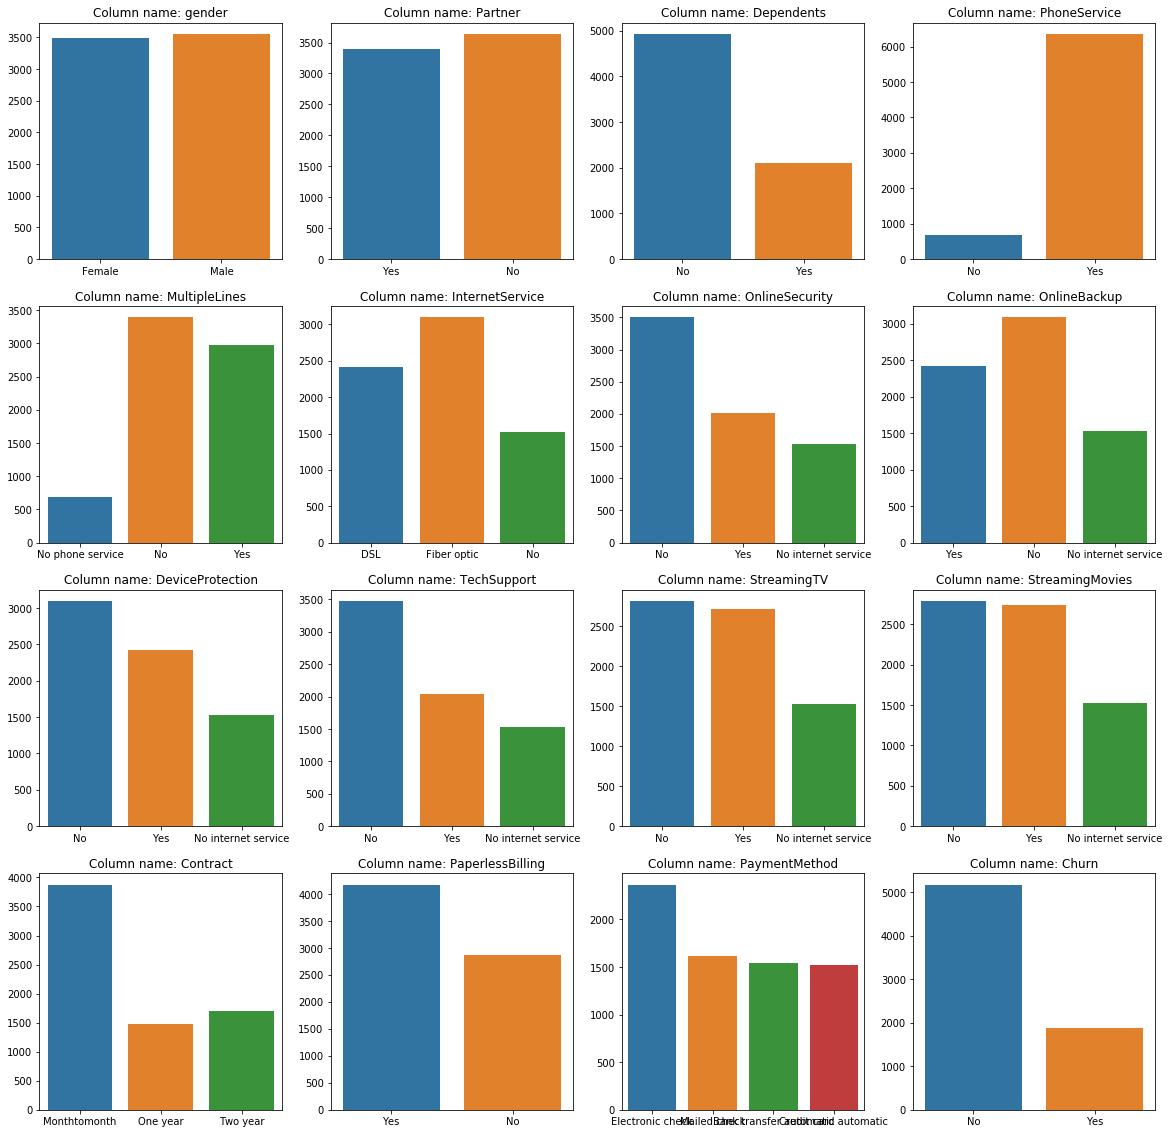

In [292]:
display_plot(df, 'customerid', object_mode = True)

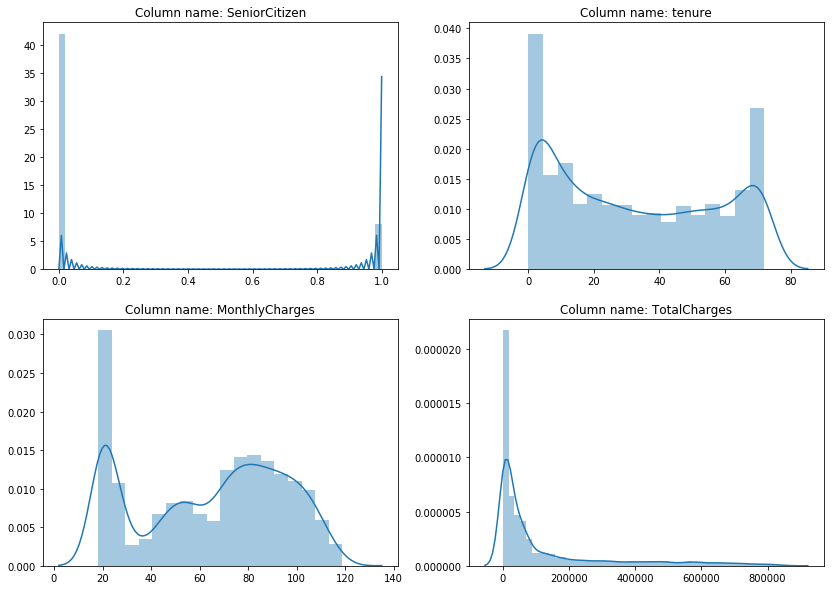

In [293]:
display_plot(df, 'customerid', object_mode = False)

###  feature Engineering 

Based on the value of the services the subscribers subscribed to, there are **yes**, **no**, and **no phone / internet service**. These are somewhat related to primary products. Examples are illustrated through *panda crosstab* function below:

1. **Phone service (Primary) and Multiple lines (Secondary)**
 
 - If the subscribers have phone service, they may have multiple lines (yes or no). 
 - But if the subscribers don't have phone service, the subscribers will never have multiple lines.
 

In [294]:
pd.crosstab(index = df["PhoneService"], columns = df["MultipleLines"])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,682,0
Yes,3390,0,2971


2. **Internet Service (Primary) and other services, let's say streaming TV (secondary)**

 - If the subscribers have Internet services (either DSL or Fiber optic), the subscribers may opt to have other services related to Internet (i.e. streaming TV, device protection).
 - But if the subscribers don't have the Internet services, this secondary service will not be available for the subscribers.
 

In [295]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingTV"])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1464,0,957
Fiber optic,1346,0,1750
No,0,1526,0



With this conclusion, I opt to transform the feature value of **No Phone / Internet service** to be the same **No** because it can be used another features (hence, **phone service** and **internet service** column) to explain.

In [296]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Monthtomonth,Yes,Electronic check,29.85,2985.0,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,18895.0,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthtomonth,Yes,Mailed check,53.85,10815.0,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer automatic,42.30,184075.0,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthtomonth,Yes,Electronic check,70.70,15165.0,Yes


In [297]:
def convert_no_service (df):
    col_to_transform = []
    for col in df.columns:
        if (df[col].dtype == 'O') & (col != 'customerid'):
            print(col, df[   df[col].str.contains("No")][col].unique() )
            if len(df[   df[col].str.contains("No")][col].unique() ) > 1:
                col_to_transform.append(col)
    
    
    print("Total column(s) to transform: {}".format(col_to_transform))
    for col in col_to_transform:
        df.loc[df[col].str.contains("No"), col] = 'No'
        
    return df

In [298]:
df = convert_no_service(df)

gender []
Partner ['No']
Dependents ['No']
PhoneService ['No']
MultipleLines ['No phone service' 'No']
InternetService ['No']
OnlineSecurity ['No' 'No internet service']
OnlineBackup ['No' 'No internet service']
DeviceProtection ['No' 'No internet service']
TechSupport ['No' 'No internet service']
StreamingTV ['No' 'No internet service']
StreamingMovies ['No' 'No internet service']
Contract []
PaperlessBilling ['No']
PaymentMethod []
Churn ['No']
Total column(s) to transform: ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [299]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthtomonth,Yes,Electronic check,29.85,2985.0,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,18895.0,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthtomonth,Yes,Mailed check,53.85,10815.0,Yes
7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer automatic,42.30,184075.0,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthtomonth,Yes,Electronic check,70.70,15165.0,Yes


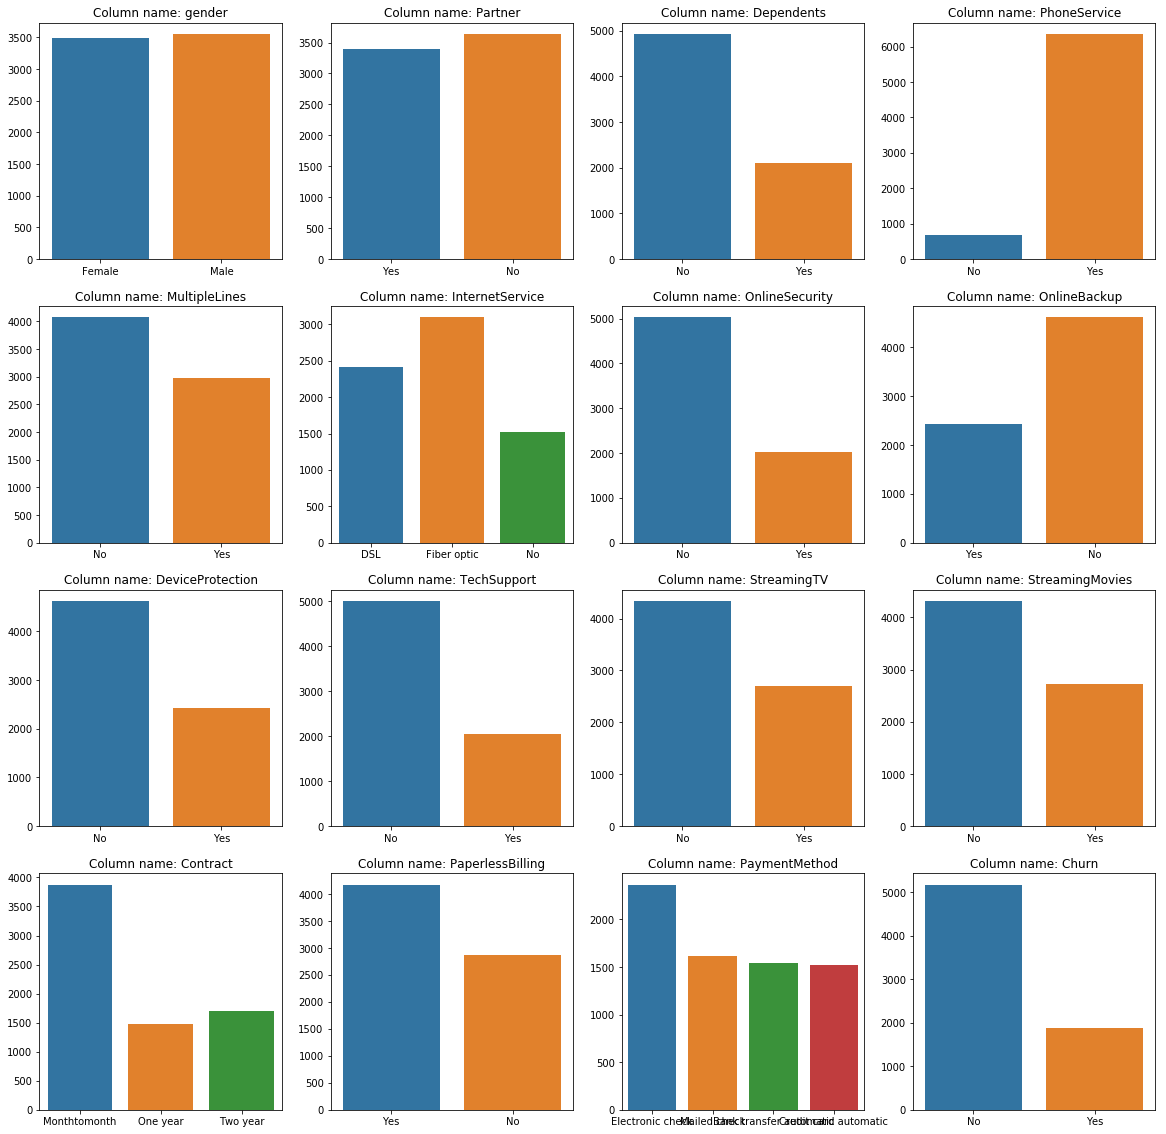

In [300]:
# Let's see the data after transformation.

display_plot(df, 'customerid', object_mode = True)

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043
Percent of Females that Left the Company 50.24077046548957
Percent of Males that Left the Company 49.75922953451043


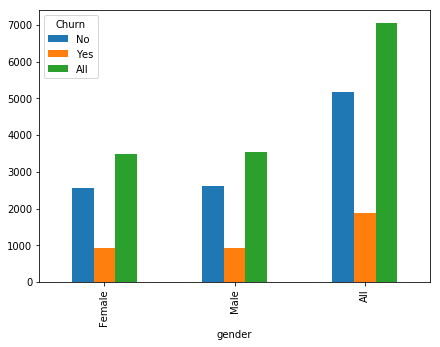

In [302]:
# Now Let's Start Comparing.
# Gender Vs Churn
print(pd.crosstab(df.gender,df.Churn,margins=True))
pd.crosstab(df.gender,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of Females that Left the Company {0}'.format((939/1869)*100))
print('Percent of Males that Left the Company {0}'.format((930/1869)*100))     

**We can See that Gender Does'nt Play an important Role in Predicting Our Target Variable.**

Churn           No   Yes   All
Contract                      
Monthtomonth  2220  1655  3875
One year      1307   166  1473
Two year      1647    48  1695
All           5174  1869  7043
Percent of Month-to-Month Contract People that Left the Company 88.55002675227395
Percent of One-Year Contract People that Left the Company 8.881754949170679
Percent of Two-Year Contract People that Left the Company 2.568218298555377


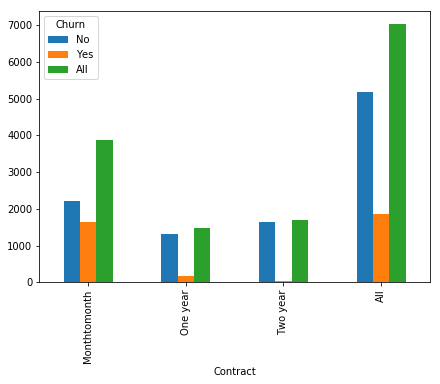

In [303]:
# Contract Vs Churn
print(pd.crosstab(df.Contract,df.Churn,margins=True))
pd.crosstab(df.Contract,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of Month-to-Month Contract People that Left the Company {0}'.format((1655/1869)*100))
print('Percent of One-Year Contract People that Left the Company {0}'.format((166/1869)*100)) 
print('Percent of Two-Year Contract People that Left the Company {0}'.format((48/1869)*100))     

**Most of the People that Left were the Ones who had Month-to-Month  Contract.**

Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043
Percent of DSL Internet-Service People that Left the Company 24.558587479935795
Percent of Fiber Optic Internet-Service People that Left the Company 69.39539860888175
Percent of No Internet-Service People that Left the Company 6.046013911182451


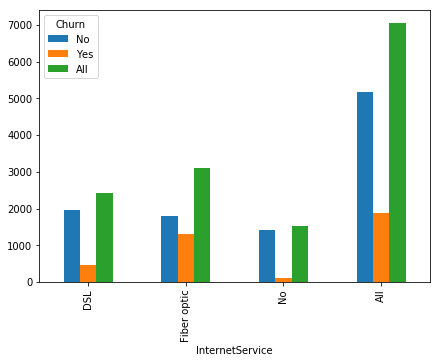

In [304]:
# Internet Service Vs Churn
print(pd.crosstab(df.InternetService,df.Churn,margins=True))
pd.crosstab(df.InternetService,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of DSL Internet-Service People that Left the Company {0}'.format((459/1869)*100))
print('Percent of Fiber Optic Internet-Service People that Left the Company {0}'.format((1297/1869)*100)) 
print('Percent of No Internet-Service People that Left the Company {0}'.format((113/1869)*100))     

**Most of the people That Left had Fiber Optic Internet-Service.**

Dependents    No   Yes   All
Partner                     
No          3280   361  3641
Yes         1653  1749  3402
All         4933  2110  7043
Percent of Partner that had Dependents 82.8909952606635
Percent of Non-Partner that had Dependents 17.10900473933649


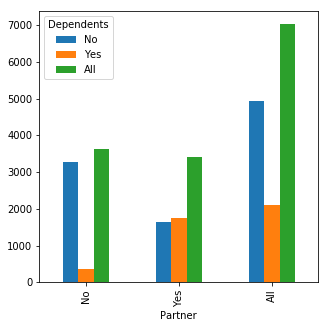

In [305]:
# Partner Vs Dependents
print(pd.crosstab(df.Partner,df.Dependents,margins=True))
pd.crosstab(df.Partner,df.Dependents,margins=True).plot(kind='bar',figsize=(5,5));

print('Percent of Partner that had Dependents {0}'.format((1749/2110)*100))
print('Percent of Non-Partner that had Dependents {0}'.format((361/2110)*100))     

**We can See Partners had a much larger percent of Dependents than Non-Partner this tells us that Most Partners might be Married.**

Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


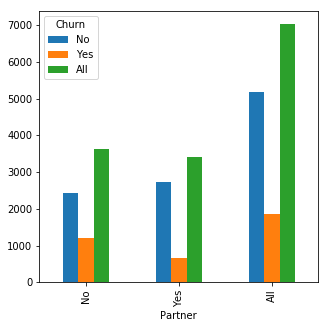

In [306]:
# Partner Vs Churn
print(pd.crosstab(df.Partner,df.Churn,margins=True))
pd.crosstab(df.Partner,df.Churn,margins=True).plot(kind='bar',figsize=(5,5));

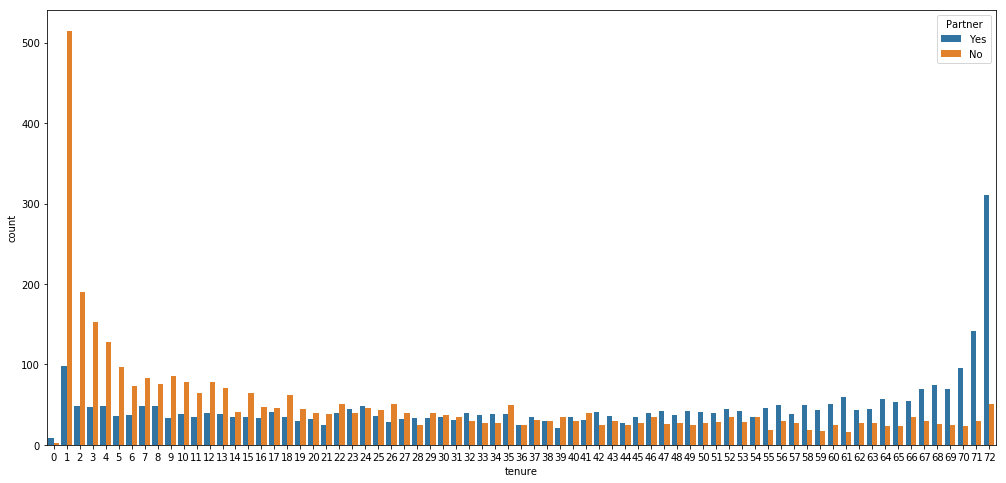

In [307]:
plt.figure(figsize=(17,8))
sns.countplot(x=df['tenure'],hue=df.Partner);

**Most of the People that Were Partner will Stay Longer with The Company. So Being a Partner is a Plus-Point For the Company as they will Stay Longer with Them.**

Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


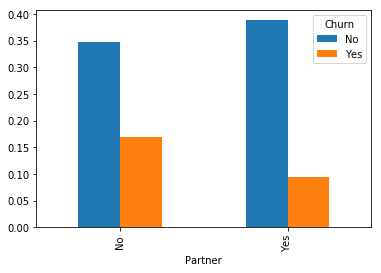

In [308]:
# Partner Vs Churn
print(pd.crosstab(df.Partner,df.Churn,margins=True))
pd.crosstab(df.Partner,df.Churn,normalize=True).plot(kind='bar');

Churn            No   Yes   All
SeniorCitizen                  
0              4508  1393  5901
1               666   476  1142
All            5174  1869  7043


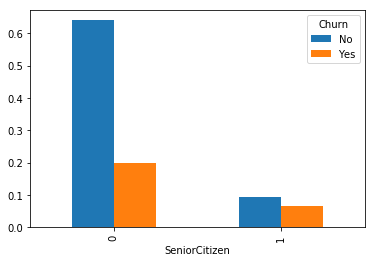

In [309]:
# Senior Citizen Vs Churn
print(pd.crosstab(df.SeniorCitizen,df.Churn,margins=True))
pd.crosstab(df.SeniorCitizen,df.Churn,normalize=True).plot(kind='bar');

**Let's Check for Outliers in Monthly Charges And Total Charges Using Box Plots**

In [310]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,126251.908419
std,0.368612,24.559481,30.090047,192372.601881
min,0.000000,0.000000,18.250000,19.000000
25%,0.000000,9.000000,35.500000,7580.500000
50%,0.000000,29.000000,70.350000,36912.000000
75%,0.000000,55.000000,89.850000,142715.000000
max,1.000000,72.000000,118.750000,867245.000000


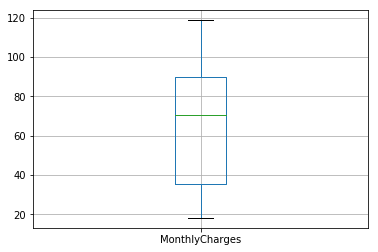

In [311]:
df.boxplot('MonthlyCharges');

**Monthly Charges don't have any Outliers so we don't have to Get into Extracting Information from Outliers.**

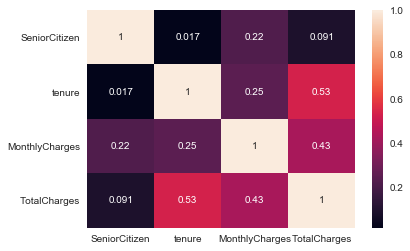

In [391]:
## correlation matrix 

# Let's Check the Correaltion Matrix in Seaborn
sns.heatmap(df.corr(),xticklabels=df.corr().columns.values,yticklabels=df.corr().columns.values,annot=True);

**Here We can See Tenure and Total Charges are correlated and also Monthly charges and Total Charges are also correlated with each other.**

**we can assume from our domain expertise that , Total Charges ~ Monthly Charges * Tenure + Additional Charges(Tax).**

## <a id='9.4'> Bucketing </a>

In [312]:
#Tenure to categorical column
def tenure_lab(telcom) :
#     print(telcom)
#     print('-'*80)
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
    
    
df["tenure_group"] = df.apply(lambda x:tenure_lab(x),axis = 1)

In [313]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Monthtomonth,Yes,Electronic check,29.85,2985.0,No,Tenure_0-12
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,18895.0,No,Tenure_24-48
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Monthtomonth,Yes,Mailed check,53.85,10815.0,Yes,Tenure_0-12
7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer automatic,42.30,184075.0,No,Tenure_24-48
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Monthtomonth,Yes,Electronic check,70.70,15165.0,Yes,Tenure_0-12


# <a id='10'>10. Data preprocessing </a>

## <a id='10.1'> Encoding categorical variable </a>

In [314]:
#replace values
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [315]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Monthtomonth,Yes,Electronic check,29.85,2985.0,No,Tenure_0-12
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,18895.0,No,Tenure_24-48
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Monthtomonth,Yes,Mailed check,53.85,10815.0,Yes,Tenure_0-12
7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer automatic,42.30,184075.0,No,Tenure_24-48
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Monthtomonth,Yes,Electronic check,70.70,15165.0,Yes,Tenure_0-12


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
tenure_group        7043 non-null object
dtypes: float64(2), i

In [317]:
print_unique_values_in_column(df)

gender  :  ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
Partner  :  ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
PhoneService  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
MultipleLines  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
InternetService  :  ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------------------------------------
OnlineSecurity  :  ['No' 'Yes']
----------------------------------------

In [318]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]

print(df.nunique())
#categorical columns
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
# df.nunique() :Return Series with number of distinct observations over requested axis.
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.nunique.html 
print(cat_cols)

cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

# df.columns = cat_cols(df.nunique() < 6) + num_cols
# cat_cols = bin_cols + multi_cols

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6433
Churn                  2
tenure_group           5
dtype: int64
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenure_group']


In [319]:
print(num_cols)
print('-'*80)
print(bin_cols)
print('-'*80)
print(multi_cols)

['tenure', 'MonthlyCharges', 'TotalCharges']
--------------------------------------------------------------------------------
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
--------------------------------------------------------------------------------
['InternetService', 'Contract', 'PaymentMethod', 'tenure_group']


In [320]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols )

In [321]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Two year,PaymentMethod_Bank transfer automatic,PaymentMethod_Credit card automatic,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
5575-GNVDE,1,0,0,0,34,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
3668-QPYBK,1,0,0,0,2,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
7795-CFOCW,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
9237-HQITU,0,0,0,0,2,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [322]:
list(df.columns)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Monthtomonth',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer automatic',
 'PaymentMethod_Credit card automatic',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure_group_Tenure_0-12',
 'tenure_group_Tenure_12-24',
 'tenure_group_Tenure_24-48',
 'tenure_group_Tenure_48-60',
 'tenure_group_Tenure_gt_60']

## <a id='10.2'> Normalizing features </a>

In [323]:
telcom = df

#Scaling Numerical columns
'''
Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:  z = (x - u) / s

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
'''

std = StandardScaler()

scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [324]:
print(scaled.shape)
scaled.head()

(7043, 3)


,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.640817
1,0.066327,-0.259629,-0.558107
2,-1.236724,-0.362660,-0.600112
3,0.514251,-0.746535,0.300600
4,-1.236724,0.197365,-0.577498


In [325]:
#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)

In [326]:
print(telcom.shape)
telcom.head(2)

(7043, 29)


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_Two year,PaymentMethod_Bank transfer automatic,PaymentMethod_Credit card automatic,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
5575-GNVDE,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [327]:
telcom.reset_index(drop=False, inplace=True)

telcom = pd.concat([telcom, scaled], axis=1)

telcom.set_index('customerID', inplace=True)

telcom.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.277445,-1.160323,-0.640817
5575-GNVDE,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0.066327,-0.259629,-0.558107
3668-QPYBK,1,0,0,0,1,0,1,1,0,0,...,0,1,1,0,0,0,0,-1.236724,-0.362660,-0.600112
7795-CFOCW,1,0,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0.514251,-0.746535,0.300600
9237-HQITU,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,-1.236724,0.197365,-0.577498


In [328]:
telcom.shape

(7043, 32)

## <a id='10.3'> spliting train/val/test data </a>

In [329]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#from yellowbrick.classifier import DiscriminationThreshold
#splitting train and test data 

# telcom = df
target_col = telcom["Churn"]

train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
# cols    = [i for i in telcom.columns if i not in  target_col]
# X_train = train[cols]
# y_train = train["Churn"]
# X_test  = test[cols]
# y_test  = test["Churn"]

X_train = train.drop(['Churn'], inplace=False, axis=1)
y_train = train["Churn"]

X_test  = test.drop(["Churn"], inplace=False, axis=1)
y_test  = test["Churn"]

In [330]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5282, 31), (5282,), (1761, 31), (1761,))

In [331]:
X_train.head(), y_train.head(), X_test.head(), y_test.head()

(            gender  SeniorCitizen  Partner  Dependents  PhoneService  \
 customerID                                                             
 3521-SYVOR       0              0        0           0             1   
 8660-BUETV       0              0        0           0             1   
 8150-QUDFX       1              0        0           0             1   
 8800-JOOCF       0              0        0           1             1   
 2292-XQWSV       1              0        1           1             0   
 
             MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  \
 customerID                                                                  
 3521-SYVOR              0               0             0                 0   
 8660-BUETV              0               0             0                 0   
 8150-QUDFX              0               0             0                 0   
 8800-JOOCF              1               0             0                 0   
 2292-XQWSV        

# <a id='11'>11. Model Building </a>

In [332]:
from sklearn.dummy import DummyClassifier

# Feature Selection and Encoding
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
from sklearn import tree , linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

In [333]:
# validation 
from sklearn import datasets, model_selection, metrics , preprocessing

In [334]:
# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [335]:
# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

In [336]:
#utilities
import time
import io, os, sys, types, time, datetime, math, random

In [337]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    

# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

### <a id='11.1'> Baseline model with DummyClassifier</a>

In [338]:
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [339]:
accuracy = clf.score(X_test, y_test)  
accuracy

0.7535491198182851

In [340]:
preds = clf.predict(X_test)


# dummyistic Regression
start_time = time.time()
train_pred_dummy, test_pred_dummy, acc_dummy, acc_cv_dummy, probs_dummy = fit_ml_algo(DummyClassifier(strategy='most_frequent',random_state=0), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
dummy_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dummy)
print("Accuracy CV 10-Fold: %s" % acc_cv_dummy)
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time))

print (metrics.classification_report(y_train, train_pred_dummy))

print (metrics.classification_report(y_test, test_pred_dummy))


Accuracy: 75.35
Accuracy CV 10-Fold: 72.83
Running Time: 0:00:11.694924
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      3847
           1       0.00      0.00      0.00      1435

   micro avg       0.73      0.73      0.73      5282
   macro avg       0.36      0.50      0.42      5282
weighted avg       0.53      0.73      0.61      5282

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1327
           1       0.00      0.00      0.00       434

   micro avg       0.75      0.75      0.75      1761
   macro avg       0.38      0.50      0.43      1761
weighted avg       0.57      0.75      0.65      1761



C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'prec

## Select Candidate Algorithms

### 1. KNN
### 2. Logistic Regression
### 3. Random Forest
### 4. Naive Bayes
### 5. Stochastic Gradient Decent
### 6. Linear SVC
### 7. Decision Tree
### 8. Gradient Boosted Trees

In [341]:
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}



# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, # Utilize all cpu core 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV took 13.05 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.800 (std: 0.004)
Parameters: {'penalty': 'l1', 'intercept_scaling': 9.8310353998994e-15, 'class_weight': None, 'C': 0.28704222948153024}

Model with rank: 2
Mean validation score: 0.747 (std: 0.003)
Parameters: {'penalty': 'l1', 'intercept_scaling': 0.00022575395294540337, 'class_weight': 'balanced', 'C': 2.420685639826174e+19}

Model with rank: 2
Mean validation score: 0.747 (std: 0.003)
Parameters: {'penalty': 'l1', 'intercept_scaling': 3.1728544140078572e-06, 'class_weight': 'balanced', 'C': 3.729556284804723e+16}

Model with rank: 4
Mean validation score: 0.746 (std: 0.003)
Parameters: {'penalty': 'l2', 'intercept_scaling': 0.00016505236901050673, 'class_weight': 'balanced', 'C': 232560.87547452754}

Model with rank: 4
Mean validation score: 0.746 (std: 0.003)
Parameters: {'penalty': 'l1', 'intercept_scaling': 5049755222753.048, 'class_weight': 'balanced', 'C': 23

C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\linear_model\logistic.py:1296: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Accuracy: 80.86
Accuracy CV 10-Fold: 80.08
Running Time: 0:00:00.465329
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3847
           1       0.67      0.53      0.59      1435

   micro avg       0.80      0.80      0.80      5282
   macro avg       0.75      0.71      0.73      5282
weighted avg       0.79      0.80      0.79      5282

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1327
           1       0.63      0.55      0.59       434

   micro avg       0.81      0.81      0.81      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761



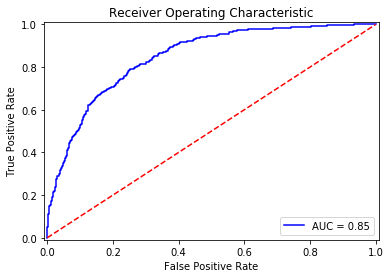

In [342]:
# Logistic Regression
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

print (metrics.classification_report(y_train, train_pred_log))

print (metrics.classification_report(y_test, test_pred_log))

plot_roc_curve(y_test, probs_log)

Accuracy: 76.77
Accuracy CV 10-Fold: 75.27
Running Time: 0:00:01.422235
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      3847
           1       0.55      0.52      0.53      1435

   micro avg       0.75      0.75      0.75      5282
   macro avg       0.69      0.68      0.68      5282
weighted avg       0.75      0.75      0.75      5282

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1327
           1       0.53      0.58      0.55       434

   micro avg       0.77      0.77      0.77      1761
   macro avg       0.69      0.71      0.70      1761
weighted avg       0.78      0.77      0.77      1761



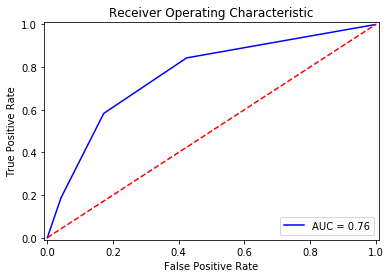

In [343]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

print (metrics.classification_report(y_train, train_pred_knn))

print (metrics.classification_report(y_test, test_pred_knn))

plot_roc_curve(y_test, probs_knn)

Accuracy: 73.54
Accuracy CV 10-Fold: 74.61
Running Time: 0:00:00.204142
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      3847
           1       0.52      0.78      0.63      1435

   micro avg       0.75      0.75      0.75      5282
   macro avg       0.71      0.76      0.72      5282
weighted avg       0.80      0.75      0.76      5282

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1327
           1       0.48      0.80      0.60       434

   micro avg       0.74      0.74      0.74      1761
   macro avg       0.70      0.76      0.70      1761
weighted avg       0.81      0.74      0.75      1761



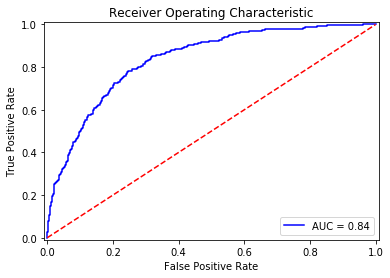

In [344]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

print (metrics.classification_report(y_train, train_pred_gaussian)) 

print (metrics.classification_report(y_test, test_pred_gaussian)) 

plot_roc_curve(y_test, probs_gau)

Accuracy: 74.11
Accuracy CV 10-Fold: 72.15
Running Time: 0:00:00.422299
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      3847
           1       0.49      0.50      0.49      1435

   micro avg       0.72      0.72      0.72      5282
   macro avg       0.65      0.65      0.65      5282
weighted avg       0.72      0.72      0.72      5282

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1327
           1       0.48      0.52      0.50       434

   micro avg       0.74      0.74      0.74      1761
   macro avg       0.66      0.67      0.66      1761
weighted avg       0.75      0.74      0.74      1761



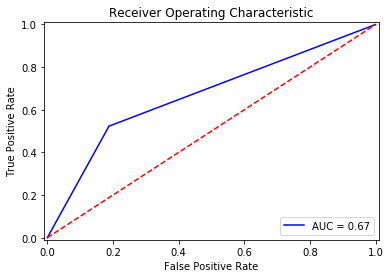

In [345]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

print (metrics.classification_report(y_train, train_pred_dt))

print (metrics.classification_report(y_test, test_pred_dt))

plot_roc_curve(y_test, probs_dt)

In [346]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV took 2.19 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.798 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 9, 'min_samples_split': 9}

Model with rank: 2
Mean validation score: 0.793 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 10, 'min_samples_split': 16}

Model with rank: 3
Mean validation score: 0.793 (std: 0.004)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 9, 'min_samples_split': 8}

Model with rank: 4
Mean validation score: 0.792 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 6, 'min_samples_split': 12}

Model with rank: 4
Mean validation score: 0.792 (std: 0.005)
Parameters: {'bootstrap': True, 'criterion': 'gini

Accuracy: 80.07
Accuracy CV 10-Fold: 79.06
Running Time: 0:00:34.143090
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3847
           1       0.64      0.52      0.58      1435

   micro avg       0.79      0.79      0.79      5282
   macro avg       0.74      0.71      0.72      5282
weighted avg       0.78      0.79      0.78      5282

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1327
           1       0.60      0.55      0.58       434

   micro avg       0.80      0.80      0.80      1761
   macro avg       0.73      0.72      0.72      1761
weighted avg       0.80      0.80      0.80      1761



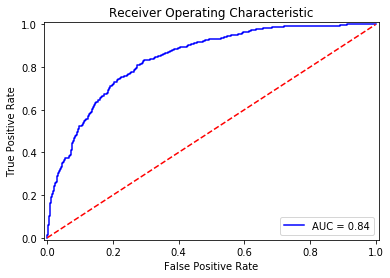

In [347]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=400, 
                             min_samples_leaf=6,
                             min_samples_split=8, 
                             criterion='gini', 
                             max_features=.8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

print (metrics.classification_report(y_train, train_pred_rf)) 

print (metrics.classification_report(y_test, test_pred_rf))

plot_roc_curve(y_test, probs_rf)

Accuracy: 80.41
Accuracy CV 10-Fold: 79.72
Running Time: 0:00:05.224701
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3847
           1       0.66      0.53      0.59      1435

   micro avg       0.80      0.80      0.80      5282
   macro avg       0.75      0.71      0.73      5282
weighted avg       0.79      0.80      0.79      5282

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1327
           1       0.61      0.55      0.58       434

   micro avg       0.80      0.80      0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.80      0.80      0.80      1761



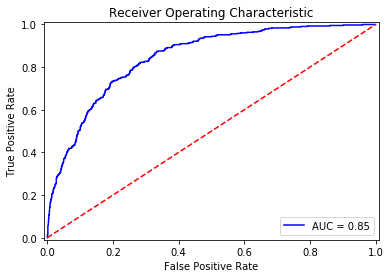

In [349]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

print (metrics.classification_report(y_train, train_pred_gbt)) 

print (metrics.classification_report(y_test, test_pred_gbt))

plot_roc_curve(y_test, probs_gbt)

In [351]:
def xgb_f1(y, t):
    #
    # Function to evaluate the prediction based on F1 score, this will be used as evaluation metric when training xgboost model
    # Args:
    #   y: label
    #   t: predicted
    #
    # Return:
    #   f1: F1 score of the actual and predicted
    #
    t = t.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y]   # change the prob to class output
    return 'f1', f1_score(t, y_bin)

best_xgb = XGBClassifier(objective = 'binary:logistic',
                         colsample_bylevel = 0.7,
                         colsample_bytree = 0.8,
                         gamma = 1,
                         learning_rate = 0.15,
                         max_delta_step = 3,
                         max_depth = 4,
                         min_child_weight = 1,
                         n_estimators = 50,
                         reg_lambda = 10,
                         scale_pos_weight = 1.5,
                         subsample = 0.9,
                         silent = False,
                         n_jobs = 4
                        )

xgbst = best_xgb.fit(X_train, y_train, eval_metric = xgb_f1, eval_set = [(X_train, y_train), (X_test, y_test)], 
             early_stopping_rounds = 20)

[14:55:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	validation_0-error:0.23173	validation_1-error:0.25724	validation_0-f1:0.640212	validation_1-f1:0.585544
Multiple eval metrics have been passed: 'validation_1-f1' will be used for early stopping.

Will train until validation_1-f1 hasn't improved in 20 rounds.
[14:55:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=4
[1]	validation_0-error:0.23173	validation_1-error:0.256672	validation_0-f1:0.640212	validation_1-f1:0.586081
[14:55:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=4
[2]	validation_0-error:0.216774	validation_1-error:0.236229	validation_0-f1:0.642523	validation_1-f1:0.598456
[14:55:52] C:\Users\Administrator\Desktop\xgboost\src\tree\update

In [352]:
train_pred_xgbst, test_pred_xgbst, acc_xgbst, acc_cv_xgbst, probs_xgbst = fit_ml_algo(xgbst, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)

[14:55:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[14:55:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=4
[14:55:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=4
[14:55:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[14:55:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[14:55:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=4
[14:55:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

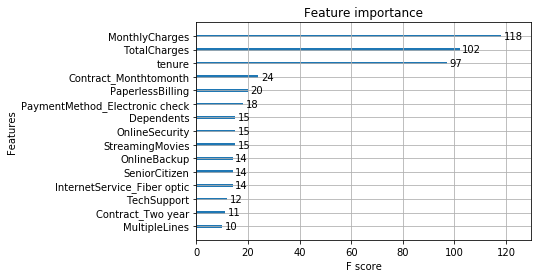

In [353]:
import xgboost as xgb
xgb.plot_importance(best_xgb, max_num_features = 15)
plt.show();

In [354]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape


((5282, 31), (5282,), (1761, 31), (1761,))

In [355]:
print(y_test.values)
print(np.argmax(y_test.values))

[0 0 0 ... 0 1 0]
3


# Using Neural Network

In [356]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(16,input_shape=(31,),activation='tanh'))
#model.add(Dense(128,activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(4,activation='tanh'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 16)                512       
_________________________________________________________________
dense_58 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_60 (Dense)             (None, 2)                 10        
Total params: 694
Trainable params: 694
Non-trainable params: 0
_________________________________________________________________


In [357]:
#fitting the model and predicting 
import numpy as seed
seed.random.seed(20)
model.fit(X_train,y_train,epochs=20)
y_pred = model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)

y_test_class = y_test.values# np.argmax(y_test.values)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/20
5282/5282 [==============================] - 1s 271us/step - loss: 0.4706 - acc: 0.7741
Epoch 2/20
5282/5282 [==============================] - 0s 91us/step - loss: 0.4485 - acc: 0.7787
Epoch 3/20
5282/5282 [==============================] - 0s 79us/step - loss: 0.4470 - acc: 0.7851
Epoch 4/20
5282/5282 [==============================] - 0s 93us/step - loss: 0.4512 - acc: 0.7819
Epoch 5/20
5282/5282 [==============================] - 0s 92us/step - loss: 0.4551 - acc: 0.7766
Epoch 6/20
5282/5282 [==============================] - 1s 101us/step - loss: 0.4396 - acc: 0.7878
Epoch 7/20
5282/5282 [==============================] - 1s 119us/step - loss: 0.4453 - acc: 0.7910
Epoch 8/20
5282/5282 [==============================] - 1s 114us/step - loss: 0.4456 - acc: 0.7866
Epoch 9/20
5282/5282 [==============================] - 1s 120us/step - loss: 0.4438 - acc: 0.7927
Epoch 10/20
5282/5282 [==============================] - 1s 112us/step - loss: 0.4534 - acc: 0.7851
Epoch 11/20
5

In [170]:
print(y_pred_class)
print(y_test_class) ##y_test_class

[0 0 1 ... 0 0 0]
[0 0 0 ... 0 1 0]


In [358]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))
acc_nn = round(metrics.accuracy_score(y_test_class,y_pred_class) * 100, 2)
print('Accuracy NN',acc_nn)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1327
           1       0.62      0.49      0.55       434

   micro avg       0.80      0.80      0.80      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.79      0.80      0.79      1761

[[1198  129]
 [ 220  214]]
Accuracy NN 80.18


## <a id='' > Compare all models </a>

In [359]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
               
              'Decision Tree', 
              'Gradient Boosting Trees',
             'Neural network'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_dt,
        acc_gbt,
        acc_nn
        
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,80.86
5,Gradient Boosting Trees,80.41
6,Neural network,80.18
2,Random Forest,80.07
0,KNN,76.77
4,Decision Tree,74.11
3,Naive Bayes,73.54


In [360]:
print(y_pred_prob)
nn=[]
for i in range(0,len(y_pred_prob)):
    nn.append(y_pred_prob[i][1])

[[0.94037104 0.05962897]
 [0.940369   0.05963093]
 [0.38481563 0.61518437]
 ...
 [0.9268908  0.07310921]
 [0.5611722  0.43882784]
 [0.9117399  0.08826004]]


In [361]:

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees',
    'Neural network'
    
]
probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt,
    nn
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'orange'
]

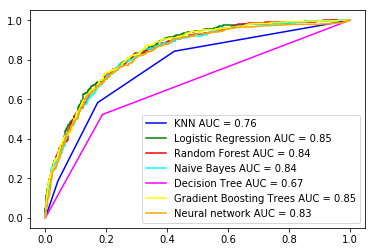

In [362]:
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

## 13.  Interpretation 

Make Conclusions from the above graph and Probability scores from the test dataset :

1. Above graph shows  Logistic Regressions and Gradient Boosting are doing good.
2. Below are most important feaure which impacts on customer leaving the organisations.
    1. Monthly Charges
    2. Total Charges
    3. Tenure
3. To reduce customer churn, better to convert them from Monthly contract to yearly contract. So that Total charges will reduces and also tenure will improve

# 14. Module Deployement

# Pickle package can be used to save and deploye above high performed module.
    pickle.dump can be used to save module to disk
    picklle.load can be used to read module from disk

In [363]:
# to store xgbst

import pickle

file_Name = "xgbst"
# open the file for writing
fileObject = open(file_Name,'wb') 

# this writes the object a to the
# file named 'testfile'
pickle.dump(xgbst,fileObject)  
fileObject.close()